# DSCI 100 002-034 Group Project Proposal

## Introduction
Question: To determine the sex of a person based on height, weight and different body measurements<br>
<br>In this group proposal, we will discuss body measurements, which include body girth measurements and skeletal diameter measurements. Body girth measurement is a method to determine the changes in body dimensions over time. The skeletal diameter measurement is to measure the diameter of a skeleton, which is the distance from one edge of the circle to another. Additionally, our data is from 507 physically active individuals (247 men and 260 women) along with their age, weight, height, and gender. We will study various physical data including weight and height to predict genders. We will use histograms, scatter plots, and other tools to visualize the data and to show the relationship between physical data and gender.
<br>
<br>Identify and describe the dataset that will be used to answer the question


## Preliminary exploratory data analysis:
<br>Demonstrating that the dataset can be read from the web into R 

In [4]:
# Importing the necessary packages
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
# Reading the tsv file (
# Source : https://www.kaggle.com/datasets/mexwell/body-measurements)

bm_data <- read_tsv("https://www.openintro.org/data/tab-delimited/bdims.txt")
head(bm_data)

Rows: 507 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (25): bia_di, bii_di, bit_di, che_de, che_di, elb_di, wri_di, kne_di, an...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,⋯,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


<br>Cleaning the data into a tidy format

In [6]:
# Tidying and organising the data
bm_tidy <- bm_data |>
            select(sho_gi, che_gi, wai_gi, age, wgt, hgt, sex)|>#selecting relevant columns
            mutate(sex = as.factor(sex)) |>
            mutate(sex = ifelse(sex == 1, "Male", "Female"))

glimpse(bm_tidy)

Rows: 507
Columns: 7
$ sho_gi <dbl> 106.2, 110.5, 115.1, 104.5, 107.5, 119.8, 123.5, 120.4, 111.0, …
$ che_gi <dbl> 89.5, 97.0, 97.5, 97.0, 97.5, 99.9, 106.9, 102.5, 91.0, 93.5, 9…
$ wai_gi <dbl> 71.5, 79.0, 83.2, 77.8, 80.0, 82.5, 82.0, 76.8, 68.5, 77.5, 81.…
$ age    <dbl> 21, 23, 28, 23, 22, 21, 26, 27, 23, 21, 23, 22, 20, 26, 23, 22,…
$ wgt    <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81.6, 76.…
$ hgt    <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, …
$ sex    <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male",…


sex,count,percentage
<chr>,<int>,<dbl>
Female,260,51.28205
Male,247,48.71795


sex,n,mean_height,mean_age,mean_wai_gi,mean_wgt,mean_che_gi,mean_sho_gi
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,260,164.8723,28.76923,69.80346,60.60038,86.0600,100.3038
Male,247,177.7453,31.66802,84.53320,78.14453,100.9899,116.5016


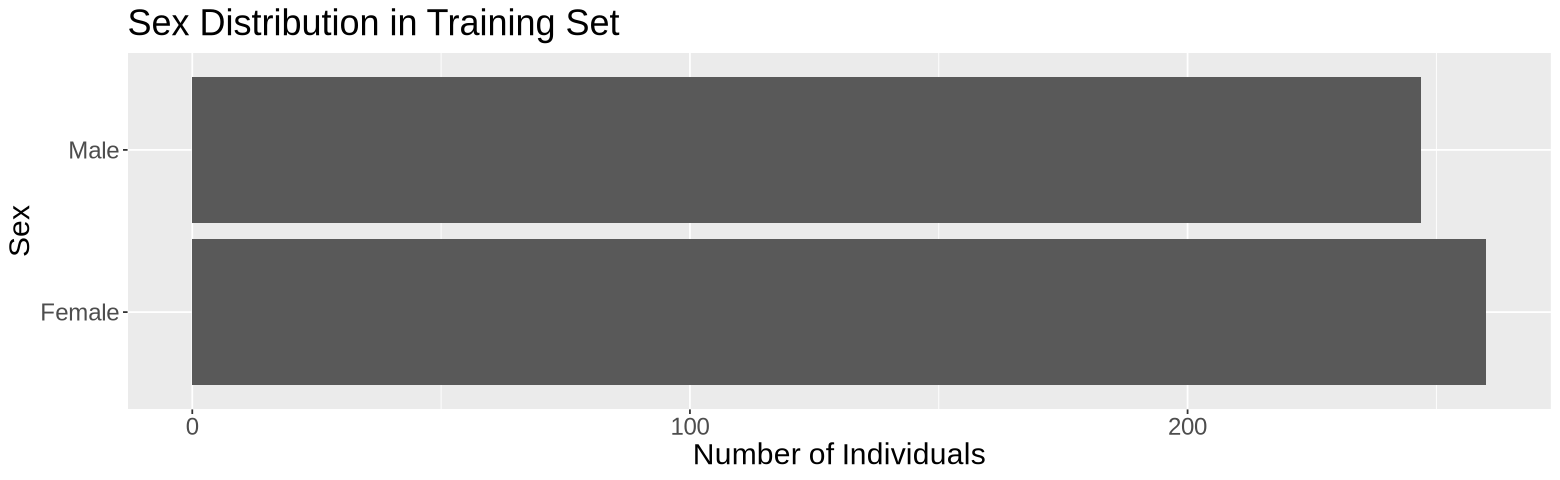

In [12]:
# Sex distribution
num_obs <- nrow(bm_tidy)
sex_count <- bm_tidy |>
  group_by(sex) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
sex_count

bm_gender_plot <- ggplot(bm_sex , aes(x = n, y = sex )) +
    geom_bar(stat = "identity") +
labs(y ="Sex", x="Number of Individuals", title="Sex Distribution in Training Set")+
    theme(text = element_text(size = 18))
bm_gender_plot

summary_data <- bm_tidy |>
    group_by(sex) |>
    summarize(n = n(),
             mean_height = mean(hgt),
             mean_age = mean(age),
             mean_wai_gi = mean(wai_gi),
             mean_wgt = mean(wgt),
             mean_che_gi = mean(che_gi),
             mean_sho_gi = mean(sho_gi))
summary_data




In [8]:
# data splitting
bm_split <- initial_split(bm_tidy, prop = 0.75, strata = sex)
bm_train <- training(bm_split)
bm_test <- testing(bm_split)

glimpse(bm_train)
glimpse(bm_test)

Rows: 380
Columns: 7
$ sho_gi <dbl> 95.0, 99.5, 88.0, 97.0, 103.3, 93.5, 93.3, 94.5, 98.6, 97.9, 97…
$ che_gi <dbl> 83.0, 78.5, 75.0, 86.5, 91.0, 79.5, 77.0, 88.0, 85.0, 79.0, 77.…
$ wai_gi <dbl> 66.5, 61.5, 61.2, 78.0, 70.5, 66.5, 58.0, 74.5, 73.5, 66.5, 61.…
$ age    <dbl> 22, 20, 19, 25, 21, 23, 26, 22, 28, 32, 25, 25, 29, 22, 25, 23,…
$ wgt    <dbl> 51.6, 59.0, 49.2, 63.0, 53.6, 59.0, 47.6, 69.8, 66.8, 55.2, 54.…
$ hgt    <dbl> 161.2, 167.5, 159.5, 157.0, 155.8, 170.0, 159.1, 166.0, 176.2, …
$ sex    <chr> "Female", "Female", "Female", "Female", "Female", "Female", "Fe…
Rows: 127
Columns: 7
$ sho_gi <dbl> 110.5, 107.5, 116.5, 107.5, 112.0, 118.5, 120.6, 107.8, 112.5, …
$ che_gi <dbl> 97.0, 97.5, 103.0, 101.5, 104.1, 104.0, 101.6, 88.7, 90.9, 97.2…
$ wai_gi <dbl> 79.0, 80.0, 85.0, 78.0, 82.0, 87.3, 81.4, 75.8, 74.0, 75.0, 77.…
$ age    <dbl> 23, 22, 20, 23, 22, 22, 26, 23, 23, 22, 24, 24, 29, 36, 24, 36,…
$ wgt    <dbl> 71.8, 78.8, 90.0, 71.0, 79.6, 85.9, 81.8, 63.2, 72.4, 67.2, 80.

In [9]:
positive_candidates <- bm_train |> 
    group_by(sex) |>
    summarize(n = n())
positive_candidates

sex,n
<chr>,<int>
Female,195
Male,185


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


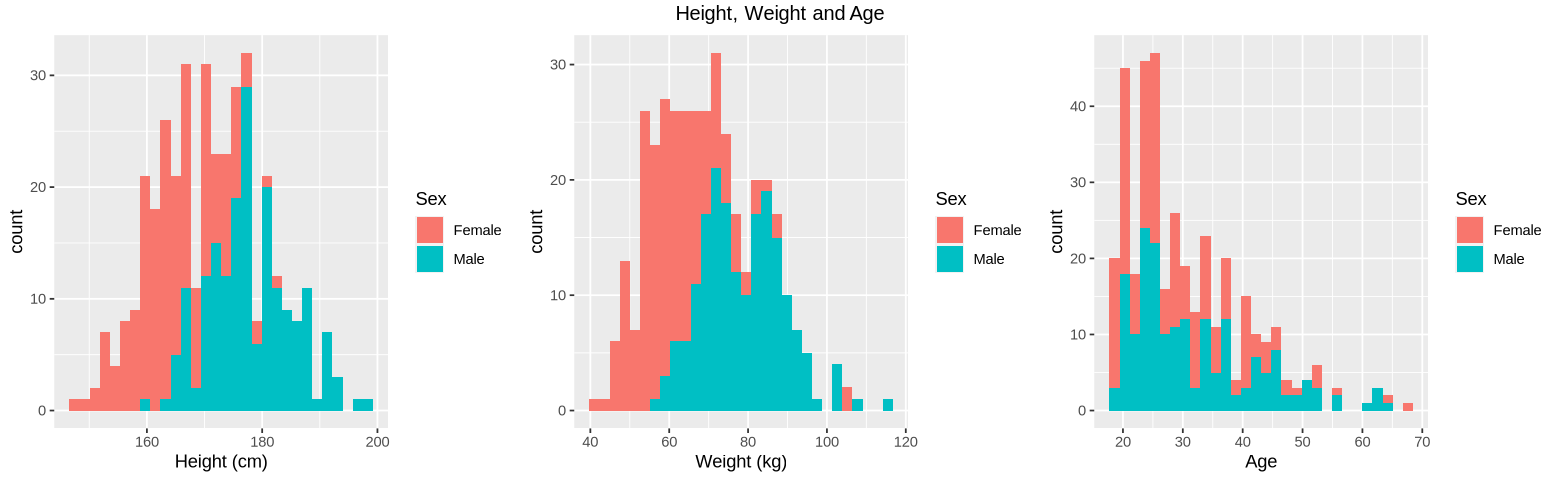

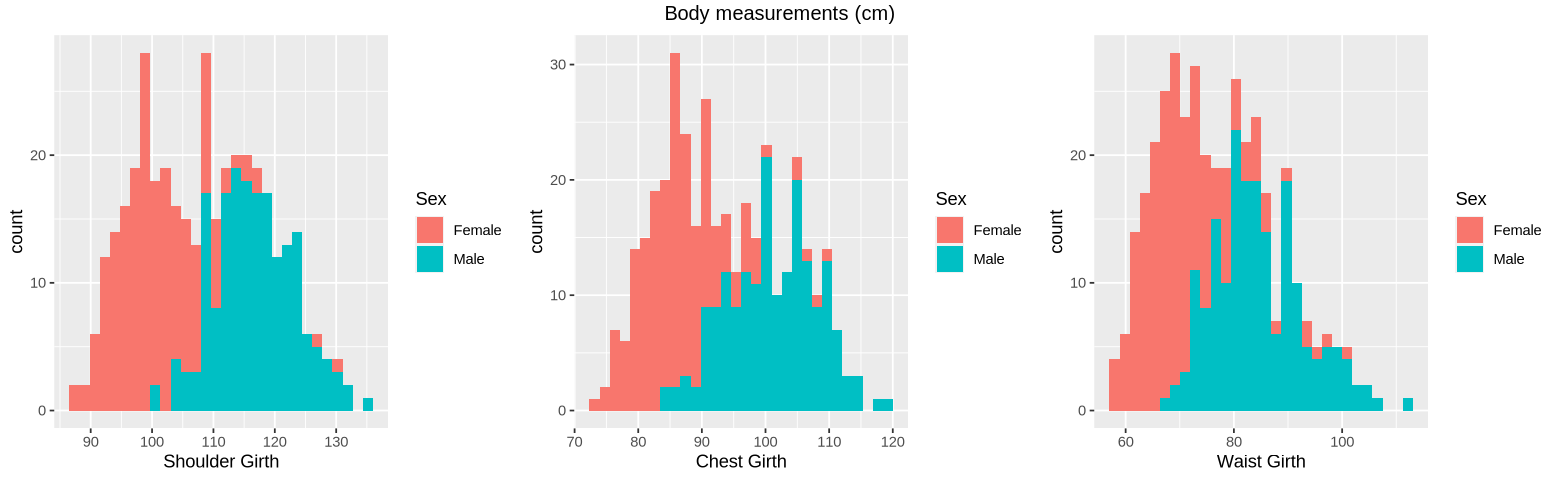

In [10]:
# Data visualisation
options(repr.plot.width=13, repr.plot.height=4)
wgt_plot <- ggplot(bm_train, aes(x = wgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Weight (kg)', fill = 'Sex')
hgt_plot <- ggplot(bm_train, aes(x = hgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Height (cm)', fill = 'Sex')
age_plot <- ggplot(bm_train, aes(x = age, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Age', fill = 'Sex')
sho_plot <- ggplot(bm_train, aes(x = sho_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Shoulder Girth', fill = 'Sex')
che_plot <- ggplot(bm_train, aes(x = che_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Chest Girth', fill = 'Sex')
wai_plot <- ggplot(bm_train, aes(x = wai_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Waist Girth', fill = 'Sex')
grid.arrange(hgt_plot, wgt_plot, age_plot, nrow = 1, top = 'Height, Weight and Age')
grid.arrange(sho_plot, che_plot, wai_plot, nrow = 1, top = 'Body measurements (cm)')

<br>Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
<br>Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

## Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results
Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

## Expected outcomes and significance:Based on preliminary analyses, we expect to be able to differentiate between male and female by a number of attributes that distinguish their biological sex. 
<br>
<br>Our findings can be applied to clinical, statistical, data to predict the biological gender of a particular individual by actively identifying these physical data of that individual. <br>In this way, automatic categorisation based on body data can be achieved, reducing the workload to some extent in an era where transgender people, gender-diverse people and so on exist. 
<br>
<br>This type of analysis and modelling raises the question of which attributes distinguish males from females, which attributes are most important, and which combination of attributes is most effective in prediction.<br><br>